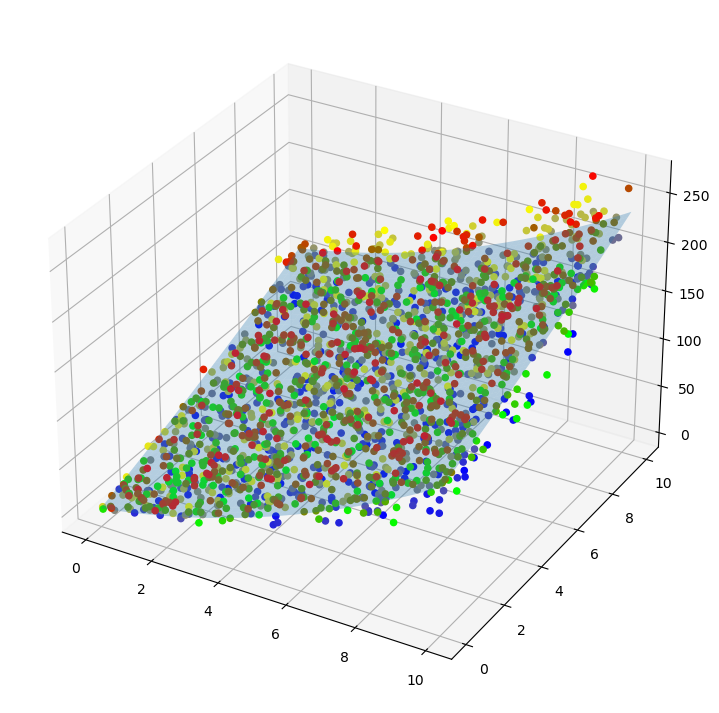

In [101]:
import random 
import torch
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

def f(x, y, theta):
    return x**2 * theta[0] + y**2 * theta[1] + x * theta[2] + y * theta[3] + theta[4]

def features_from_x(num):
    x, y = num
    return [x**2, y**2, x, y]

def generate_dataset(size, fudge_factor):
    # Generate some test data that has a random element but is broadly based on 
    # f
    x = np.random.random(size=(1,size))
    x *= 10
    y = np.random.random(size=(1,size))
    y *= 10
    fudge_array = (np.random.random(size=(1,size)) * fudge_factor + 1 - 0.5 * fudge_factor)
    z = fudge_array * f(x, y, actual_theta)

    return x, y, z, fudge_array

def plot_dataset(ax, x, y, z, fudge, lo_colour, hi_colour):
    colormap = colors.LinearSegmentedColormap.from_list('custom', 
                    [(0, lo_colour), (1, hi_colour)], N=256)
    ax.scatter3D(x,y,z, alpha = 1, cmap=colormap, c = fudge)


# Generate a matrix of x, y and z where z = theta1*x**2 + theta2*y**2 + theta3*x + theta4*y
actual_theta = [random.random() , random.random() , random.random() * 10, random.random() * 10, random.random() * 10]

def new_figure():
    X, Y = np.meshgrid(np.linspace(0,10,1000), np.linspace(0,10,1000))
    Z = f(X, Y, actual_theta)

    fig = plt.figure(num = 1, clear = True, figsize=(14, 9))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    ax.plot_surface(X, Y, Z, alpha = 0.3)

    return ax

ax = new_figure()

tr_x, tr_y, tr_z, tr_fudge = generate_dataset(1000, 0.5)
test_x, test_y, test_z, test_fudge = generate_dataset(1000, 0.5)
plot_dataset(ax, tr_x, tr_y, tr_z, tr_fudge, '#00ff00', '#ff0000')
plot_dataset(ax, test_x, test_y, test_z, test_fudge, '#0000ff', '#ffff00')

plt.show()

135.9260744755608


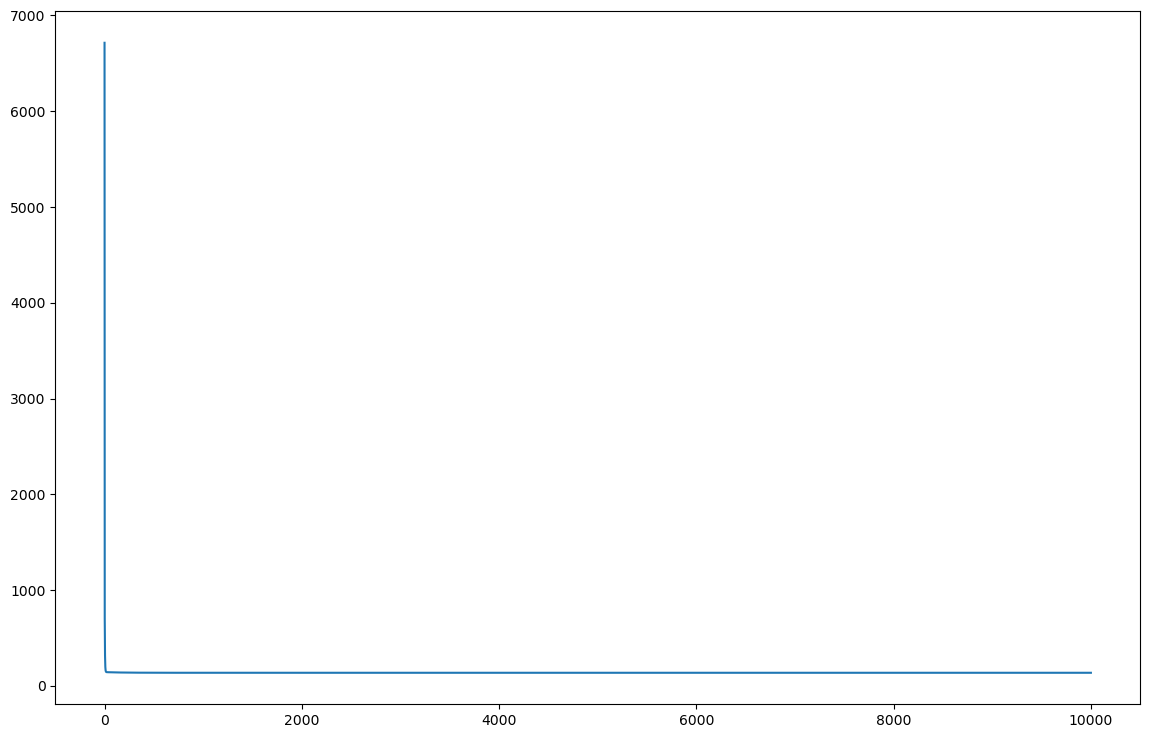

In [102]:
def pre_process(data1, data2, mean = None, range = None):   
    x = np.apply_along_axis(features_from_x, 1, np.array([data1[0], data2[0]]).transpose())

    if mean is None or range is None:
        mean = x.mean(0)
        range = x.max(0) - x.min(0)
    x -= mean
    x /= range

    x = np.c_[x, np.ones(len(x))]
    return x, mean, range

x, x_mean, x_range = pre_process(tr_y, tr_x)    
m = len(x)
# Init the hypothesis
h_theta = np.zeros(len(x[0]))
rate = 1
cost = []

for i in range(1, 10000):
    errors = np.matmul(h_theta, x.T) - tr_z
    gradients = np.zeros(len(h_theta))

    # Calculate the new values of h_theta 
    for feat_index in range(0, len(h_theta)):
        # Translation of the gradient descent equation...
        gradient = ( errors * x.T[feat_index]).sum() * (1/m)
        gradients[feat_index] = gradient
        h_theta[feat_index] -=  gradient * rate        
    cost.append((errors ** 2).sum() / (2 * m))

print(cost[-1])
fig = plt.figure(num = 1, clear = True, figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost)
plt.show()

Errors: 1000, cost: 15.941309429184301


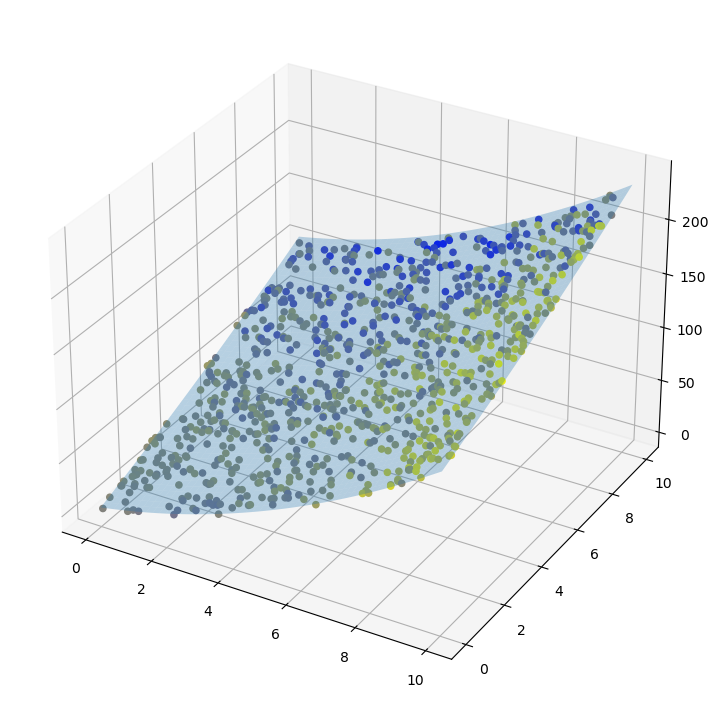

In [103]:
tr_x_2 = pre_process(test_x, test_y, x_mean, x_range)[0]
test_calculated_z = np.matmul(h_theta, tr_x_2.T)
errors = test_calculated_z - test_z
errors = errors[0]
m = len(errors)
cost = np.abs(errors).sum() / m
print(f"Errors: {m}, cost: {cost}")
ax = new_figure()
plot_dataset(ax, test_y, test_x, test_calculated_z, errors, '#0000ff', '#ffff00')

